In [11]:
#general/plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
color_blindf = ["#3f90da", "#ffa90e", "#bd1f01", "#832db6", 
"#a96b59", "#e76300", "#b9ac70", "#92dadd", "#94a4a2"]

## Pluronic P123 Temperature Phase Diagram

In [12]:
# Load excel with structures
samples = pd.read_excel('./20220414_APS_Cap1.xlsx')

In [16]:
# define structure and colors
phases= ['Unimer', 'Multiphase', 'Correlated Micelle', 'Micelle', 'FCC',  'RHCP',      'HCP',  'HCP+HEX',     'HEX']
colors = ['lightgrey', 'brown',      'darkorange' ,        'tan',     'green','turquoise', 'turquoise', 'turquoise', 'blue']
colors = [4, 3, -1, 5, 6, 0, 0, 0, 1]
marks = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

#Connect structure to color
def struc_color(struc, phase_list):
    for i in range(len(phase_list)):
        if struc == phase_list[i]:
            return color_blindf[i]  

#Connect structure to mark
def struc_mark(struc, phase_list):
    for i in range(len(phase_list)):
        if struc == phase_list[i]:
            return marks[i]

In [17]:
def phase_dia(x_col, y_col, title):
    
    fig, ax = plt.subplots()

    x = samples[x_col].values
    y = samples[y_col].values
    
    phase_struc = samples['Phase'].values
    phase_mark = []
    phase_color = []
    
    phase_struc_u = samples.Phase.unique()
    
    # Plotting
    for i in range(len(samples)):
        phase_mark.append(struc_mark(phase_struc[i], phases))
        phase_color.append(struc_color(phase_struc[i], phases))
        ax.plot(x[i], y[i], color = phase_color[i], marker=phase_mark[i], 
                 markersize = 20, markeredgecolor='black', 
                 markeredgewidth = 0, 
                 linestyle= 'None'
                 )
    ax.set_xlabel('P123 wt%', fontsize=22)
    ax.set_ylabel('Temperature (°C)', fontsize=22)
    

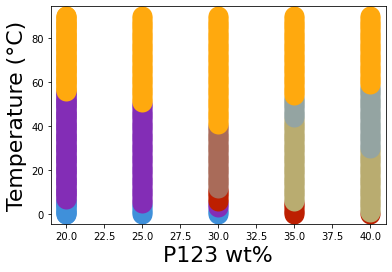

In [18]:
phase_dia('3P wt%', 'Temp', 'PPBT_0_P123_Y')

## Pluronic P123 35 wt% 

In [6]:
#load data
sequence = np.load('P123_35.npz')

q = sequence['q']
I = sequence['I']

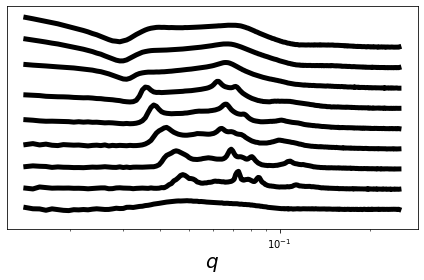

In [7]:
fig, ax = plt.subplots()        

# plot
for i in range(len(q)):
    qval = q[i]
    intensity = I[i]
    ax.loglog(qval, intensity, c = 'black', linewidth = 5)

# formatting
ax.set_xlabel(r'$q$', fontsize=20)
ax.tick_params(left = False, right = False , labelleft = False)
ax.set_ylim(1e-3, 1e8)
plt.tight_layout()  
